In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io

In [12]:
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')

In [13]:
image_stack.shape

(2048, 2048, 3)

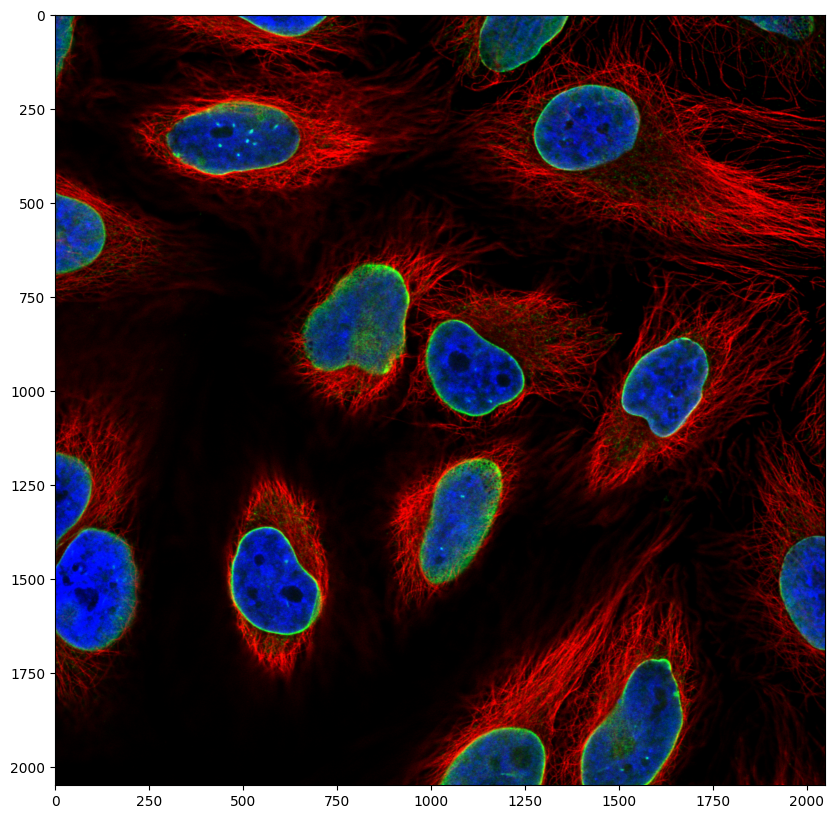

In [14]:
plt.subplots(figsize=(10, 10))
plt.imshow(image_stack);

In [15]:
image_nuclei = image_stack[:, :, 2]


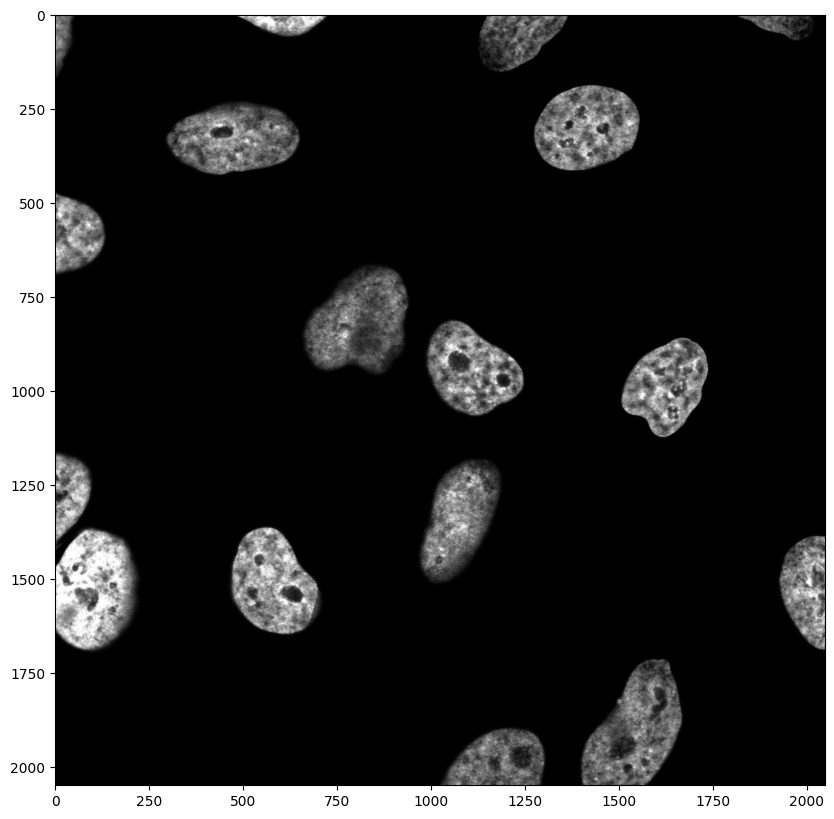

In [16]:
plt.subplots(figsize=(10, 10))
plt.imshow(image_nuclei, cmap = 'gray');

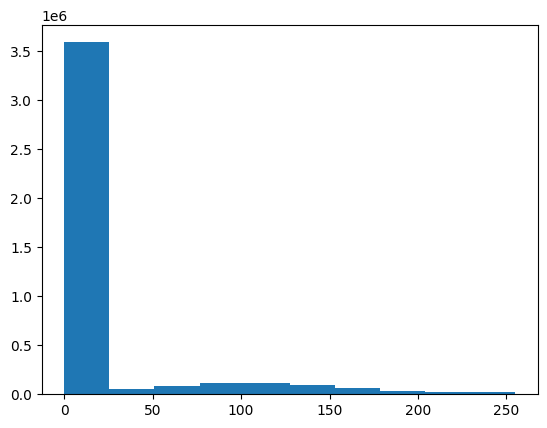

In [17]:
plt.hist(np.ravel(image_nuclei));

In [18]:
mask = image_nuclei > 50

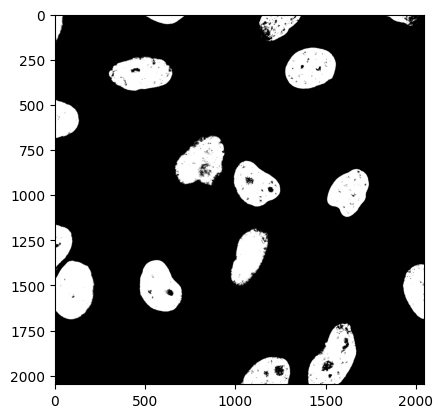

In [19]:
plt.imshow(mask, cmap = 'gray');

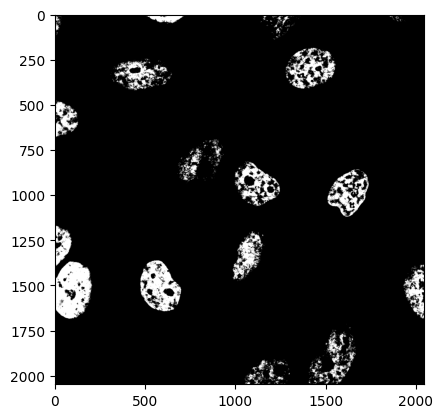

In [20]:
mask = image_nuclei > 120
plt.imshow(mask, cmap = 'gray');

In [21]:
import skimage.filters

help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image=None, nbins=256, *, hist=None)
    Return threshold value based on Otsu's method.
    
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    
    Parameters
    ----------
    image : (N, M[, ..., P]) ndarray, optional
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    hist : array, or 2-tuple of arrays, optional
        Histogram from which to determine the threshold, and optionally a
        corresponding array of bin center intensities. If no hist provided,
        this function will compute it from the image.
    
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    References
    ----------

In [22]:
my_otsu_threshold = skimage.filters.threshold_otsu(image_nuclei)
print(my_otsu_threshold)

66


In [23]:
mask_nuclei = image_nuclei > my_otsu_threshold

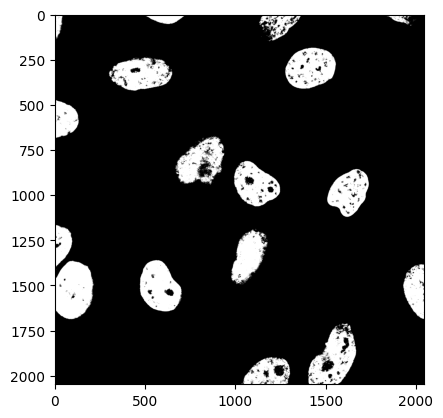

In [24]:
plt.imshow(mask_nuclei, cmap = 'gray');

In [25]:
image_cells = image_stack[:, : ,0]

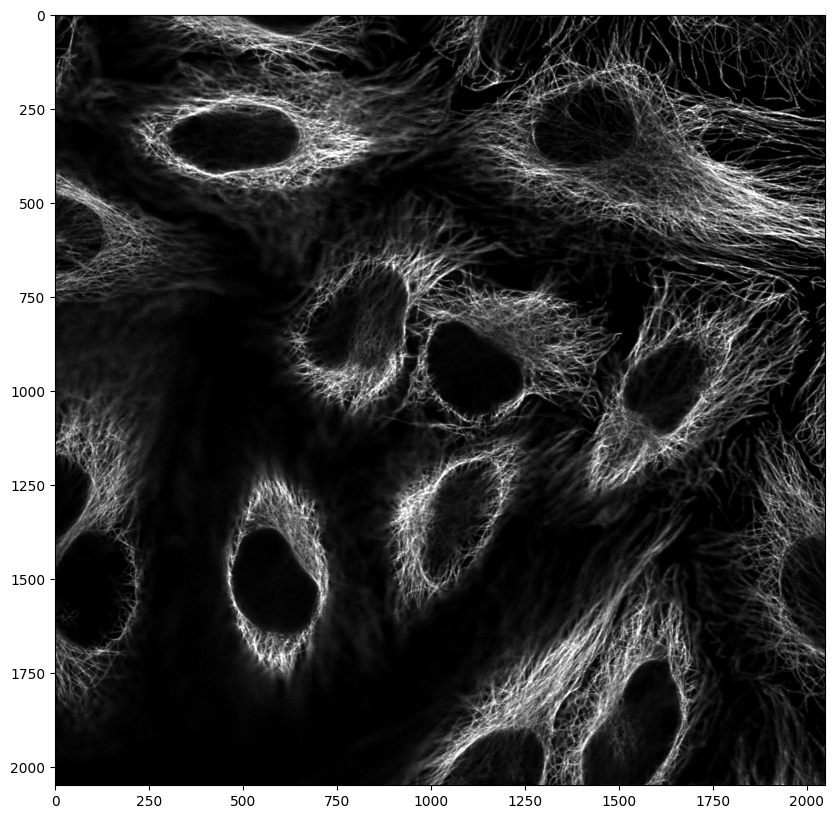

In [27]:
plt.subplots(figsize=(10, 10))
plt.imshow(image_cells, cmap = 'gray');

In [28]:
mask_cells = image_cells > skimage.filters.threshold_otsu(image_cells)

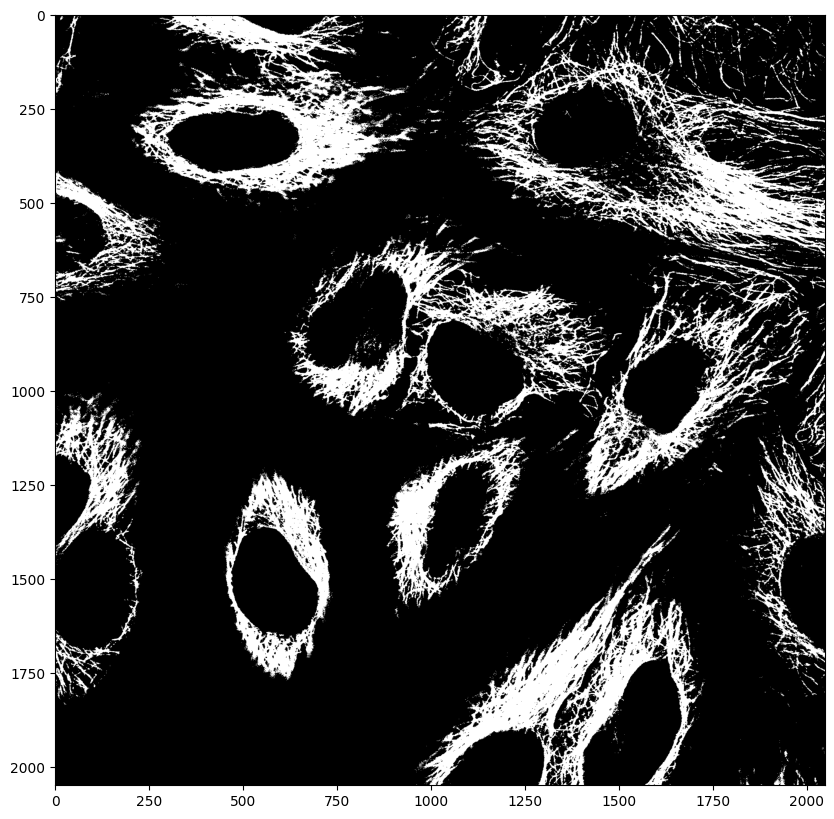

In [30]:
plt.subplots(figsize=(10, 10))
plt.imshow(mask_cells, cmap = 'gray');

In [31]:
both_masks = mask_cells * mask_nuclei

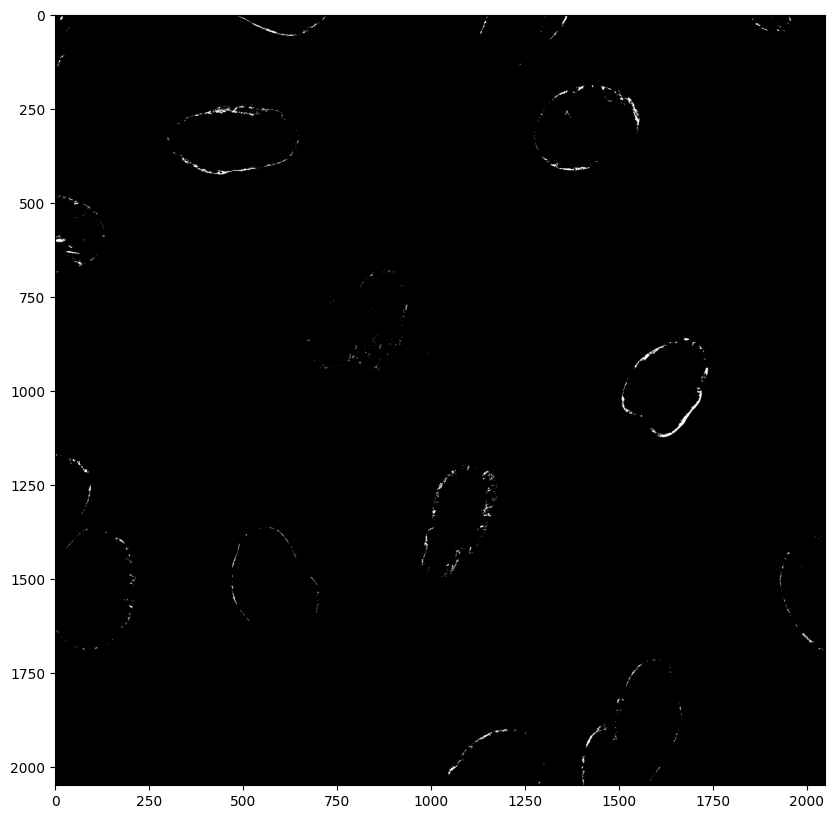

In [32]:
plt.subplots(figsize=(10, 10))
plt.imshow(both_masks, cmap = 'gray');

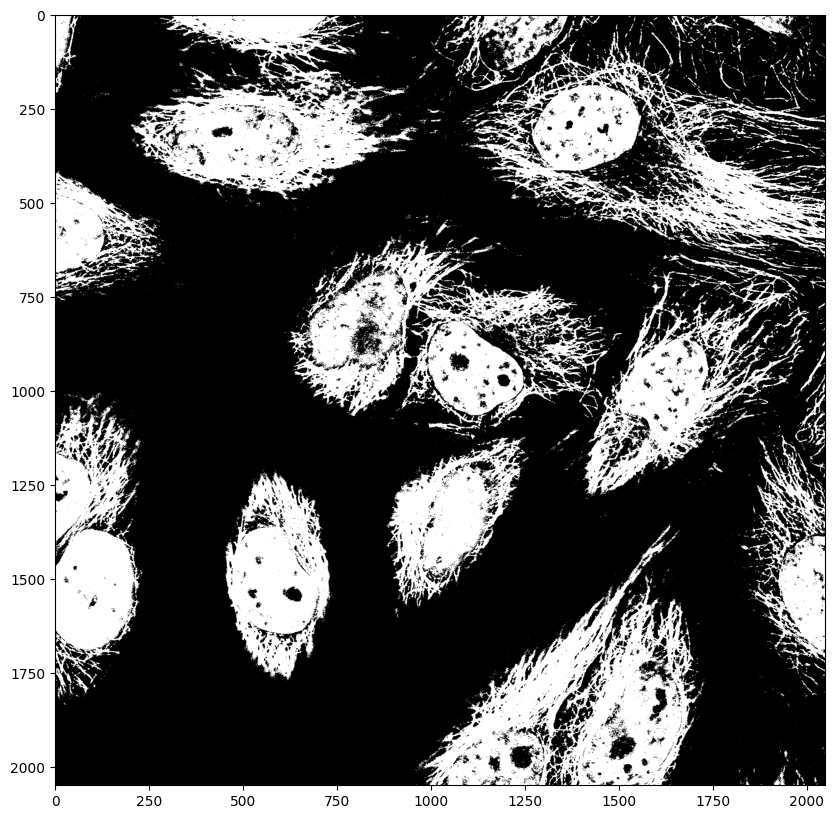

In [33]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells + mask_nuclei, cmap = 'gray');

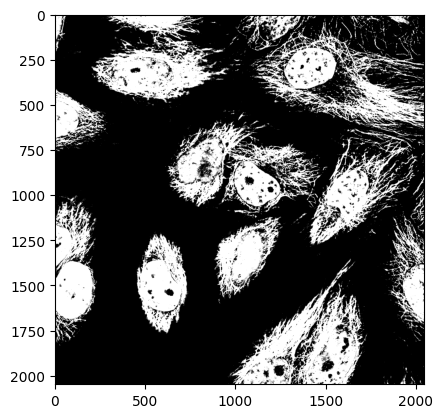

In [34]:
combine_or = np.logical_or(mask_cells, mask_nuclei)
plt.imshow(combine_or, cmap = 'gray');